In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pynbody
import pynbody.plot.sph as sph

In [19]:
filepth = 'Starting-Stuff/IsoB_1000/GLX.0'
timestep = (['1000'])

filenom = (filepth+timestep[0])
dno = timestep[0]
gal = pynbody.load(filenom) 
print (gal.dm)

t_now =  gal.properties['time'].in_units('Myr')
timestr = str( np.round(float(t_now),1) )

#Put CoM in middle
pynbody.analysis.angmom.faceon(gal)

<FamilySubSnap "Starting-Stuff\IsoB_1000\GLX.01000::dm" len=1000000>


<Transformation faceon>

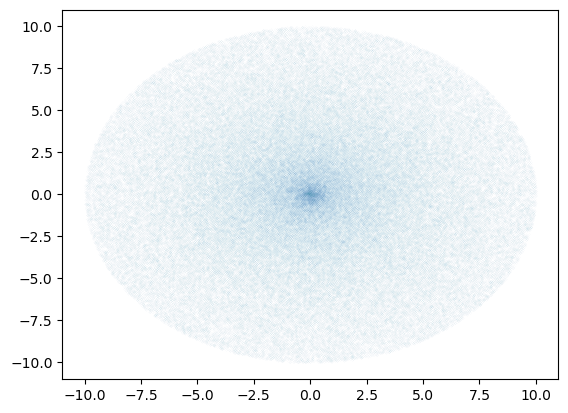

In [3]:
x = gal.dm['x']
y = gal.dm['y']

#age = gal.star['tform'].in_units('Myr') < 1000

rho = np.sqrt(x**2 + y**2)
phi = np.angle(x + 1j * y)

radii = 10
mask = (rho <= radii) * (rho >= -radii)

x = x[mask]
y = y[mask]

rho = rho[mask]
phi = phi[mask]

plt.plot(x, y, marker='.', linestyle='None', markersize=0.1, alpha=0.2)
#plt.gca().invert_xaxis()


In [ ]:
conc = gal.dm["rho"]
conc = conc[mask]
plt.clf()
plt.scatter(x, y, c=conc, cmap='plasma', s=0.05)#, alpha=0.05)
plt.colorbar()

In [ ]:
plt.clf()
sph.image(gal.dm,qty='vr',width='20 kpc',cmap='magma',show_cbar = True, resolution=1000)
plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)

In [20]:
res = 1000

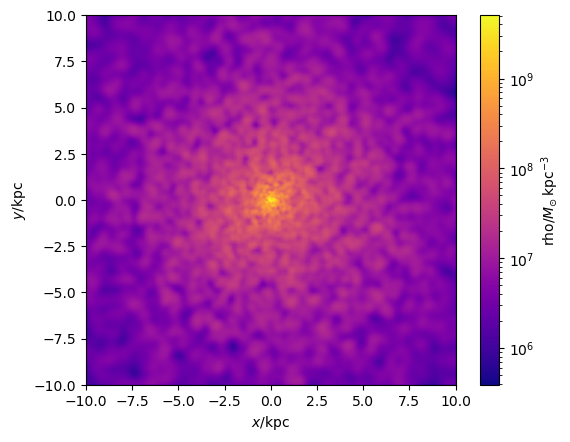

In [21]:
plt.clf()
figG=plt.figure(1)
axG=figG.add_subplot(1,1,1)

dm=sph.image(gal.dm,qty='rho',width='20 kpc',cmap='plasma', resolution=res,
                       subplot=axG,show_cbar=True, return_array=True, log=True)

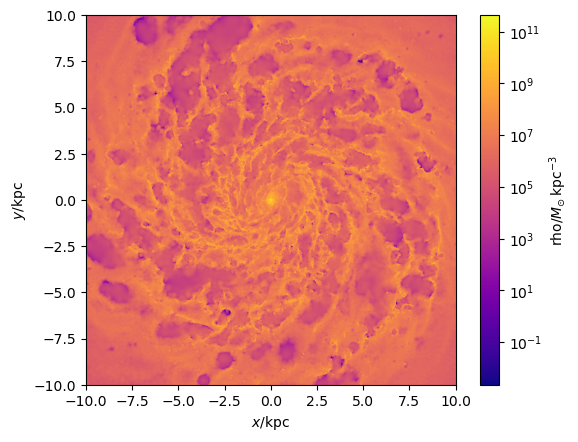

In [22]:
plt.clf()
figG=plt.figure(1)
axG=figG.add_subplot(1,1,1)

gas=sph.image(gal.gas,qty='rho',width='20 kpc',cmap='plasma', resolution=res,
                       subplot=axG,show_cbar=True, return_array=True, log=True)

In [ ]:
from matplotlib import colors

def norm(arr, n = 1):
    return (arr - np.min(arr))/(np.max(arr) - np.min(arr)) * n

relation = norm(gas) - norm(dm)
relation = norm(-relation)
relation[relation >= 0.3] = 0
plt.clf()
plt.imshow(relation, origin='lower', cmap='plasma', norm = colors.LogNorm())
plt.colorbar(label='Normalised Gas - DM Density')
plt.title('Gas - DM Density Relation')
plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)

xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]
plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

1. Run spiral structure/flocculency code on both gas/star and relation -> see if it changes anything
2. If they are both similar, i.e return same clusters then dark matter doesn't affect spiral structure? But it could also be that dark matter affects spiral structure -> more defined spiral arms?

In [ ]:
from matplotlib import colors

def norm(arr, n = 1):
    return (arr - np.min(arr))/(np.max(arr) - np.min(arr)) * n

relation = gas - dm
plt.clf()
plt.imshow(-relation, origin='lower', cmap='plasma', norm=colors.LogNorm())
plt.colorbar()
xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]
plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

In [ ]:
x1 = np.indices(relation.shape)[0].flatten()
x2 = np.indices(relation.shape)[1].flatten()
X = np.array([x1, x2]).T
Y = relation.flatten()

In [ ]:
dens = np.mean(relation)
avg_dist = (dens * 1.5) ** (-1/3) 
avg_dist *= 1.5

In [ ]:
from sklearn.cluster import DBSCAN

clf = DBSCAN(eps=np.sqrt(2))
clf.fit(X, sample_weight=Y)

In [ ]:
for i in range(-1, clf.labels_.max() + 1):
    print(i, np.sum(clf.labels_ == i))

In [ ]:
temp = X

In [ ]:
X = norm(temp, 2) - 1
X = X * 10
X

In [6]:
outliers = clf.labels_ == -1

radius = 10 #kpc
plt.clf()
#make a scatter plot with points coloured according to the DBSCAN labels
cmap = plt.get_cmap("plasma")
colors = cmap((clf.labels_+1)/np.max(clf.labels_+1))

#do things with sample weights and gas particle weights?

def dbscan(ax, fs=15):
    ax.scatter(X[outliers,1], X[outliers,0], facecolor='black', marker='.',
            s=0.1, alpha=0.05)
    ax.scatter(X[~outliers,1], X[~outliers,0], facecolor=colors[~outliers], marker='.',
            s=0.1, alpha=0.3)
    ax.set_xlabel('x (kpc)', fontsize=fs)
    ax.set_ylabel('y (kpc)', fontsize=fs)
    ax.tick_params(axis='both', labelsize=12)
    
    

fig, ax = plt.subplots(figsize=(10,10))
dbscan(ax)

#fig.gca().invert_xaxis()
fig.tight_layout()

NameError: name 'clf' is not defined

Text(0.5, 0, 'Radius (kpc)')

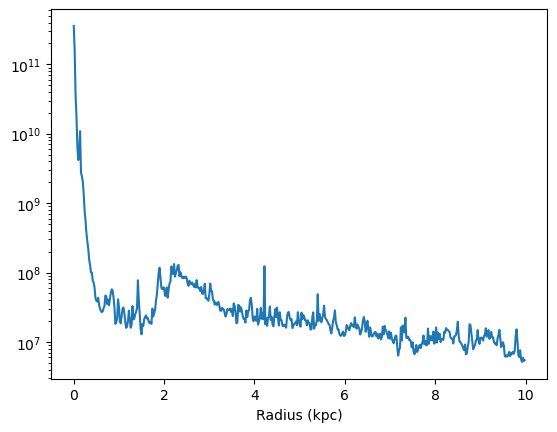

In [23]:
##Overdensities
def radial_profile(data):
    center = [int(i / 2) for i in data.shape]
    x, y = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile

plt.clf()


radial = radial_profile(gas)
rad = np.linspace(0, np.sqrt(10**2 + 10 ** 2), radial.shape[0])

radial = radial[rad <= 10]
rad = rad[rad <= 10]

plt.semilogy(rad, radial)
plt.xlabel("Radius (kpc)")


[3.60793417e+11 4.69011828e+01 5.48214084e+07 1.00000000e+00]
[[1.29679748e+09 1.30247499e+04            nan 0.00000000e+00]
 [1.30247499e+04 3.62659348e-01 1.20331806e+03 0.00000000e+00]
 [           nan 1.20331806e+03 5.89134051e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


C:\Users\Shaurya\AppData\Local\Temp\ipykernel_39348\2324143999.py:12: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(pcov))


Text(0.5, 0, 'Radius (kpc)')

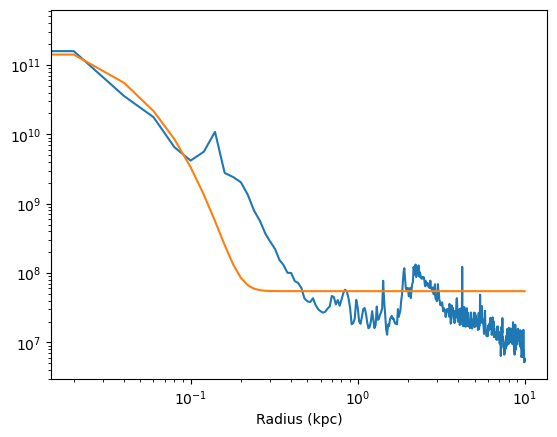

In [24]:
def sersic(x, a, b, c, n):
    n = 1
    return a * np.exp((x**(1/n)) * -b) + c

from scipy.optimize import curve_fit

bounds = ([100000, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf])

popt, pcov = curve_fit(sersic, rad, radial, maxfev = 2000, bounds = bounds)

print(popt)
print(np.sqrt(pcov))
plt.clf()

#radial = radial_profile(gas)
#rad = np.linspace(0, np.sqrt(10**2 + 10 ** 2), radial.shape[0])

plt.loglog(rad, radial)
plt.plot(rad, sersic(rad, *popt))
plt.xlabel("Radius (kpc)")

In [25]:
def radial_profile(data):
    center = [int(i / 2) for i in data.shape]
    x, y = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile

In [26]:
def sersic(x, a, b, c, n):
    n = 1
    return a * np.exp((x**(1/n)) * -b) + c

[3.60793417e+11 4.69011828e+01 5.48214084e+07 1.00000000e+00]
54821408.384929806
[4.52207604e+09 5.46772898e+00 2.75030962e+07 1.00000000e+00]
27503096.165787756


(0.0, 1000.0)

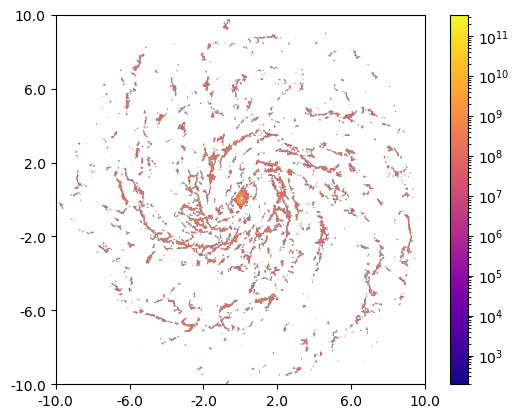

In [27]:
def overdensity(data):
    radial = radial_profile(data)
    rad = np.linspace(0, np.sqrt(10**2 + 10 ** 2), radial.shape[0])

    radial = radial[rad <= 10]
    rad = rad[rad <= 10]
    
    bounds = ([100000, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf])

    popt, pcov = curve_fit(sersic, rad, radial, maxfev = 2000, bounds = bounds)
    print(popt)
    
    x, y = np.meshgrid(range(data.shape[0]), range(data.shape[0]))
    center = [i / 2 for i in data.shape]
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r / r.max() * np.sqrt(10**2 + 10 ** 2)
    
    
    sphere = sersic(r, *popt)
    print(sphere.min())
    
    return data - sphere
    
from matplotlib import colors

plt.clf()
gas_over = overdensity(gas)
dm_over = overdensity(dm)
plt.imshow(gas_over, origin='lower', cmap='plasma', norm = colors.LogNorm())
plt.colorbar()


xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]

plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

plt.xlim(0, res)
plt.ylim(0, res)
    
    
    

[3.60793417e+11 4.69011828e+01 5.48214084e+07 1.00000000e+00]
54821408.384929806
[4.52207604e+09 5.46772898e+00 2.75030962e+07 1.00000000e+00]
27503096.165787756


(0.0, 1000.0)

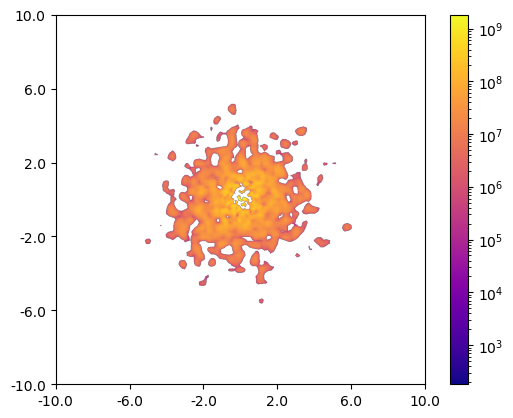

In [28]:
plt.clf()
gas_over = overdensity(gas)
dm_over = overdensity(dm)
plt.imshow(dm_over, origin='lower', cmap='plasma', norm = colors.LogNorm())
plt.colorbar()

xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]

plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

plt.xlim(0, res)
plt.ylim(0, res)

[3.60793417e+11 4.69011828e+01 5.48214084e+07 1.00000000e+00]
54821408.384929806
[4.52207604e+09 5.46772898e+00 2.75030962e+07 1.00000000e+00]
27503096.165787756


(0.0, 1000.0)

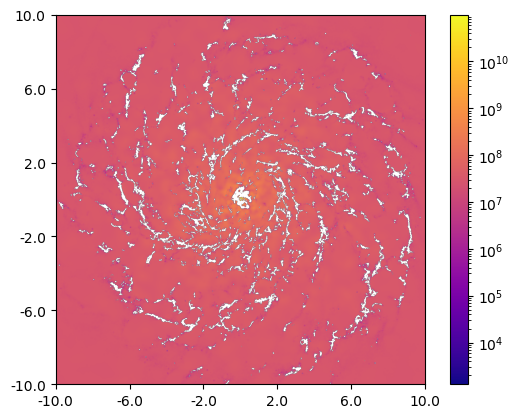

In [29]:
plt.clf()
gas_over = overdensity(gas)
dm_over = overdensity(dm)
plt.imshow(dm_over - gas_over, origin='lower', cmap='plasma', norm = colors.LogNorm())
plt.colorbar()

xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]

plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

plt.xlim(0, res)
plt.ylim(0, res)

In [30]:
relation = dm_over - gas_over
relation = -relation
x1 = np.indices(relation.shape)[0].flatten()
x2 = np.indices(relation.shape)[1].flatten()
X = np.array([x1, x2]).T
Y = relation.flatten()

dens = np.mean(relation)
avg_dist = (dens * 1.5) ** (-1/3) 
avg_dist *= 1.5

C:\Users\Shaurya\AppData\Local\Temp\ipykernel_39348\1145514742.py:9: RuntimeWarning: invalid value encountered in scalar power
  avg_dist = (dens * 1.5) ** (-1/3)


In [31]:
from sklearn.cluster import DBSCAN

clf = DBSCAN(eps=np.sqrt(2))
clf.fit(X, sample_weight=Y)

,eps,np.float64(1.4142135623730951)
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [32]:
for i in range(-1, clf.labels_.max() + 1):
    print(i, np.sum(clf.labels_ == i))

-1 894108
0 97
1 12
2 588
3 38
4 37
5 16
6 62
7 41
8 23
9 65
10 148
11 75
12 29
13 28
14 35
15 9
16 16
17 81
18 33
19 25
20 39
21 137
22 9
23 121
24 44
25 537
26 655
27 20
28 112
29 9
30 43
31 30
32 25
33 52
34 124
35 12
36 12
37 34
38 210
39 91
40 20
41 67
42 6
43 9
44 20
45 50
46 16
47 12
48 28
49 99
50 44
51 16
52 32
53 37
54 20
55 128
56 170
57 856
58 56
59 1116
60 232
61 104
62 32
63 41
64 12
65 202
66 34
67 19
68 12
69 125
70 54
71 90
72 109
73 12
74 1267
75 9
76 648
77 6
78 123
79 67
80 25
81 30
82 82
83 74
84 24
85 15
86 137
87 300
88 41
89 215
90 34
91 691
92 87
93 1209
94 64
95 25
96 147
97 109
98 54
99 30
100 317
101 50
102 12
103 21
104 25
105 89
106 20
107 130
108 335
109 9
110 30
111 78
112 59
113 14
114 40
115 9
116 193
117 107
118 22
119 83
120 32
121 208
122 30
123 86
124 16
125 41
126 20
127 9
128 25
129 44
130 72
131 97
132 1194
133 88
134 43
135 15
136 85
137 35
138 32
139 368
140 16
141 79
142 451
143 133
144 115
145 63
146 19
147 15
148 23
149 34
150 223
151 62
15

(0.0, 1000.0)

<Figure size 640x480 with 0 Axes>

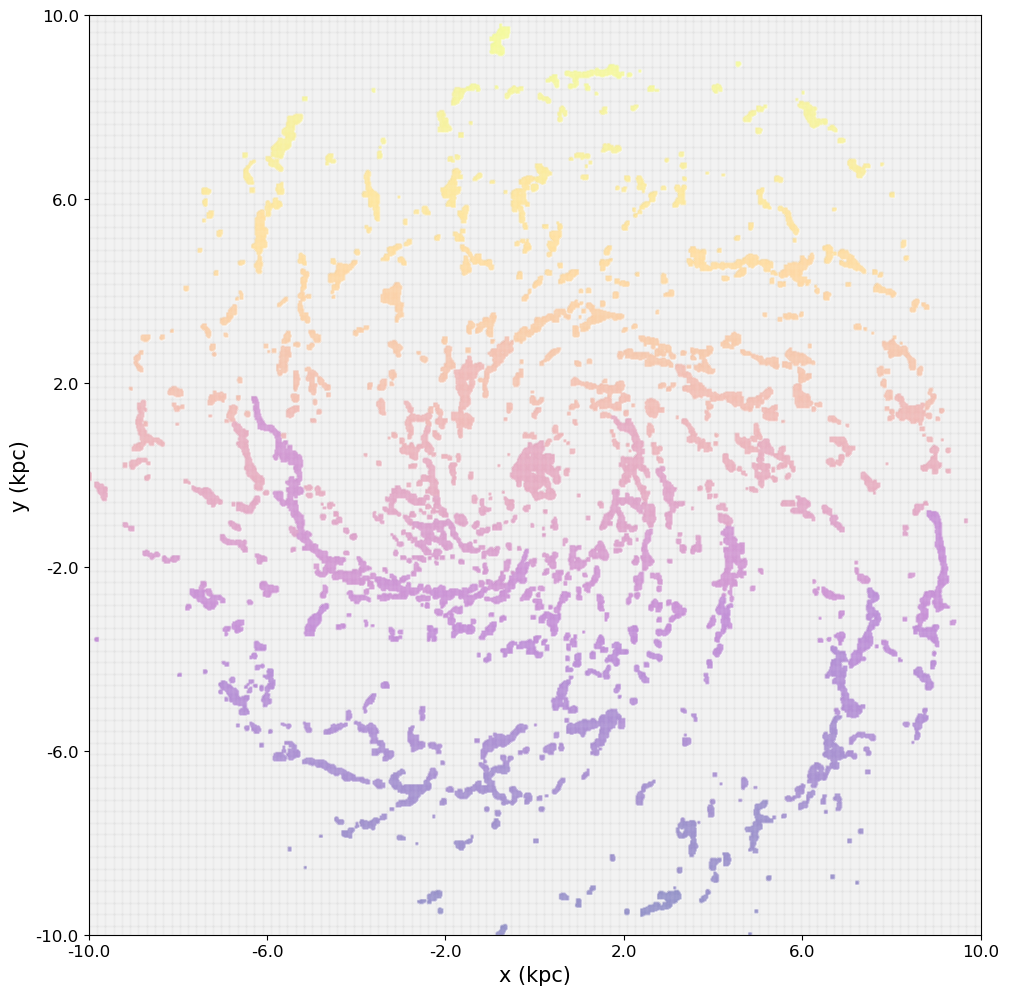

In [33]:
outliers = clf.labels_ == -1

radius = 10 #kpc
plt.clf()
#make a scatter plot with points coloured according to the DBSCAN labels
cmap = plt.get_cmap("plasma")
colors = cmap((clf.labels_+1)/np.max(clf.labels_+1))

#do things with sample weights and gas particle weights?

def dbscan(ax, fs=15):
    ax.scatter(X[outliers,1], X[outliers,0], facecolor='black', marker='.',
            s=0.1, alpha=0.05)
    ax.scatter(X[~outliers,1], X[~outliers,0], facecolor=colors[~outliers], marker='.',
            s=0.1, alpha=0.4)
    ax.set_xlabel('x (kpc)', fontsize=fs)
    ax.set_ylabel('y (kpc)', fontsize=fs)
    ax.tick_params(axis='both', labelsize=12)
    
    

fig, ax = plt.subplots(figsize=(10,10))
dbscan(ax)

#fig.gca().invert_xaxis()
fig.tight_layout()

xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]
plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

plt.xlim(0, res)
plt.ylim(0, res)

